<a href="https://colab.research.google.com/github/LucasColas/ML01-Machine-Learning-for-everyone/blob/main/TD8_Logistic_Regression_%26_LASSO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML01 : TD8 - Régression Logistique - Partie 2

Réalisé par Cyprien Gilet et Khaled Belahcene

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 1. Régression Logistique Scikit-Learn sur base de données Diabete_UCI

Dans cette section nous souhaitons prendre en main l'algorithme de régression logistique proposé par Scikit-Learn sur la base de données Diabete_UCI. Concernant cette base de données, l'objectif est de diagnostiquer la variable d'intérêt diabète. 
Le code ci-dessous permet d'importer la base de données Diabete_UCI.

In [2]:
df = pd.read_csv('diabetes_UCI.csv')
print(df.columns.values)
print('df =', df)
print('df_Info =', df.info())

df = df.reset_index()
df.drop(['index'], axis='columns', inplace=True)

YRdf = pd.DataFrame(df['Outcome'])
YR = np.array(YRdf).ravel()
print('np.unique(YR) =', np.unique(YR))

Xdf = df.copy()
Xdf.drop(['Outcome'], axis='columns', inplace=True)

K = int(np.max(YR))
X = np.array(Xdf)

['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age' 'Outcome']
df =      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        

**Question 1.1.** Diviser aléatoirement la base de données en une base d'apprentissage et une base de test : 

- La base d'apprentissage contiendra $n=500$ observations (patients).
- La base de test contiendra les observations (patients) restants (soit 268).

In [3]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [4]:
# RÉPONSE À LA QUESTION 1.1:
x_train, x_test, y_train, y_test = train_test_split(X, YR, test_size=1-500/X.shape[0])

In [5]:
x_train.shape

(500, 8)

In [6]:
y_train

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,

In [8]:
x_test.shape

(268, 8)

**Question 1.2.** À partir de la base d'apprentissage calibrer la Régression Logistique en appliquant la fonction proposée par Scikit-Learn. 

- Quelle est l'accuracy globale sur la base d'apprentissage ?
- Quelle est l'accuracy globale sur la base de test ?


In [7]:
# RÉPONSE À LA QUESTION 1.2:
model = LogisticRegression(max_iter=1000).fit(x_train, y_train)

In [9]:
#accuracy training set
model.score(x_train, y_train)

0.786

In [10]:
#accuracy test set
model.score(x_test, y_test)

0.7388059701492538

**Question 1.3.** Comparer ces résultats avec ceux obtenus par le classifieur LDA (cf TD 4). 

In [11]:
# RÉPONSE À LA QUESTION 1.3:
LDA = LinearDiscriminantAnalysis()
LDA.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [12]:
LDA.score(x_train, y_train)

0.788

In [13]:
LDA.score(x_test, y_test)

0.7238805970149254

**Question 1.4.** Interprétation du modèle de Régression Logistique : 

- Quel est le score de probabilité estimé par la Régression Logistique que le deuxième patient de la base de test soit diabétique ?
- Quel est le score de probabilité estimé par la Régression Logistique que le cinquième patient de la base de test soit diabétique ?
- Calculer le Odds-Ratio d'être diabétique pour un patient de 65 ans avec une pression sanguine de 70 par rapport à un patient de 33 ans avec une pression sanguine de 40.

In [14]:
# score de probabilité estimé par la Régression Logistique 
#que le deuxième patient de la base de test soit diabétique
a = x_test[1,:]
a = np.reshape(a, (-1,8))

In [15]:
y_test[1]

1

In [16]:
a.shape

(1, 8)

In [17]:

model.predict_proba(a)[0][0]


0.6983246653864696

In [18]:
#Score de probabilité estimé par la Régression Logistique 
#que le cinquième patient de la base de test soit diabétique ?
b = x_test[4,:]
b = np.reshape(b, (-1, 8))
print("y real : ", y_test[4])
model.predict_proba(b)

y real :  0


array([[0.97235791, 0.02764209]])

In [19]:
model.intercept_ #wo

array([-9.44358324])

In [20]:
weights = model.coef_

In [21]:
weights.shape

(1, 8)

In [22]:
bp = weights[0,2] #blood pressure

In [23]:
age = weights[0,7] #age
age

0.01355615186454198

In [24]:
#Odds-Ratio d'être diabétique pour un patient de 65 ans avec 
#une pression sanguine de 70 par rapport 
#à un patient de 33 ans avec une pression sanguine de 40.

Odds_ratio = np.exp(37*age)
Odds_ratio

1.6513243774982462

# 2. Régularisation LASSO sur base de données Diabete_UCI

Dans cette section nous souhaitons sélectionner un petit nombre de variables permettant d'expliquer la variable d'intérêt diabète. 
Le code ci-dessous permet d'importer la base de données Diabete_UCI.

**Question 2.1.** À partir de l'aide proposée par Scikit-Learn, implémenter un algorithme permettant de sélectionner les 3 variables les plus linéairement pertinentes à partir d'une régularisation LASSO pour expliquer la variable Diabète.
- Afficher en parallèle sur deux figures l'évolution des poids $\beta$ ainsi que de l'accuracy globale en fonction de l'hyperparamètre de régularisation $\lambda$.
- Quel hyperparamètre de régularisation $\lambda$ choisireriez-vous pour sélectionner les 4 variables les plus pertinentes ? 
- Quelles seraient ainsi les 4 variables les plus pertinentes ?

In [26]:
alphas = np.arange(10e-10, 10e-1, 0.01)
alphas.shape

(100,)

In [27]:
# RÉPONSE À LA QUESTION 2.1:
from sklearn.linear_model import LogisticRegression

np.random.seed(407)

#model = LogisticRegression(penalty='l1',max_iter=1000, solver='liblinear').fit(x_train, y_train)
#alpha = 10e-4
alphas = np.arange(10e-10, 10e-2, 0.001)
res = np.ones((alphas.shape[0], 8))
acc = np.zeros((1, alphas.shape[0]))

for i,alpha in enumerate(alphas): 
    #print(i, alpha)
    model2 = LogisticRegression(max_iter=10000, C=alpha, penalty='l2', solver='liblinear')
    model2.fit(x_train, y_train)
    weights2 = model2.coef_
    #print(model2.coef_)
    acc[0, i] = model2.score(x_train, y_train)
    for j in range(weights2.shape[1]):
      
      res[i, j] = weights2[0,j]
    

In [ ]:
acc

In [ ]:
res.shape

(10000, 8)

In [ ]:
plt.plot(alphas, acc.ravel())
plt.show

In [ ]:
res.shape[1]

8

[Text(0, 0.5, 'Weights'), Text(0.5, 0, 'Lambda')]

<Figure size 1520x720 with 0 Axes>

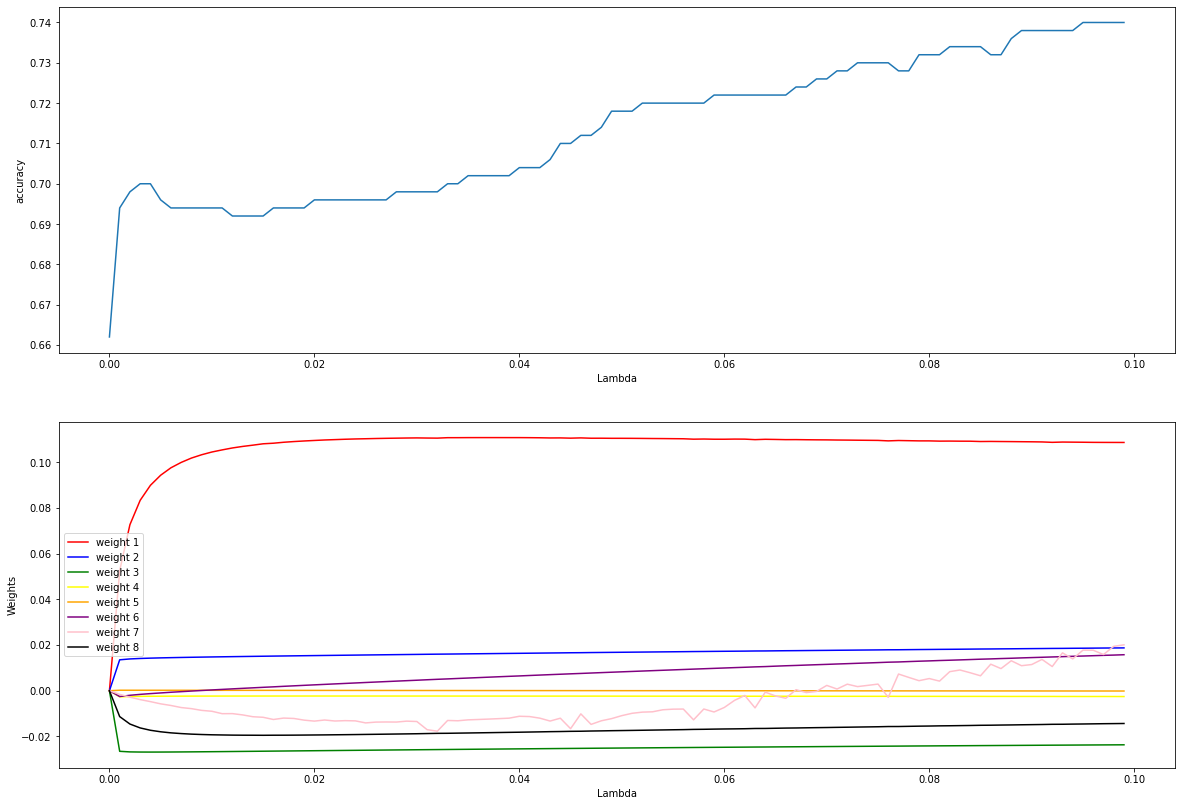

In [28]:
plt.figure(figsize=(19, 9), dpi=80)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 14))

ax1.plot(alphas, acc.ravel())
ax2.plot(alphas, res[:, 0], color='red', label='weight 1')
ax2.plot(alphas, res[:, 1], color='blue', label='weight 2')
ax2.plot(alphas, res[:, 2], color='green', label='weight 3')
ax2.plot(alphas, res[:, 3], color='yellow', label='weight 4')
ax2.plot(alphas, res[:, 4], color='orange', label='weight 5')
ax2.plot(alphas, res[:, 5], color='purple', label='weight 6')
ax2.plot(alphas, res[:, 6], color='pink', label='weight 7')
ax2.plot(alphas, res[:, 7], color='black', label='weight 8')
ax2.legend()

ax1.set(xlabel='Lambda', ylabel='accuracy')
ax2.set(xlabel='Lambda', ylabel='Weights')

# 3. Extension au contexte multi-class sur base de données Abalone :

Dans cette section nous souhaitons appliquer la régression logistique lorsque le nombre de classe est supérieur à 2 ($K\geq 2$).
Pour ce faire nous allons considérer la base de données Abalone.
Plus de détails concernant cette base de données sont disponibles ici : https://www.kaggle.com/datasets/rodolfomendes/abalone-dataset

- L'objectif pour cette base de données connue est de prédire l'âge d'un coquillage (Abalone) en fonction de 8 variables descriptives.
- Nous considérons 5 classes à prédire (5 tranches d'âges différentes) {A1, A2, A3, A4, A5} vérifiant les âges suivants 
{$[\leq 4], [5, 10], [11, 15], [16, 20], [\geq 21]$}.
- À noter que la première variable descriptive (caractérisant le sexe) est catégorielle à 3 valeurs possibles :
    - 1 si M
    - 2 si F
    - 3 si I (Nourrisson)
    
Le code ci-dessous permet d'importer la base de données Abalone. 

In [ ]:
### Load data
from scipy.io import loadmat
data = loadmat('Datasets/abalone_data.mat')
data.keys()

K = int(data['K'][0][0])
Xdf = pd.DataFrame(data['X'])
YRdf = pd.DataFrame(data['YR'], columns = ['Labels'])
YR = np.array(YRdf).ravel()

In [ ]:
Xdf

,0,1,2,3,4,5,6,7
0,3.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,3.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,1.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,3.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,2.0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,1.0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,3.0,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,3.0,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,1.0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


**Question 3.1.** Comment encoder la variable catégorielle ? Appliquer cet encodage ci-dessous :

In [ ]:
# RÉPONSE À LA QUESTION 3.1:



**Question 3.2.** Diviser aléatoirement la base de données en une base d'apprentissage et une base de test : 

- La base d'apprentissage contiendra $n=3000$ observations (patients).
- La base de test contiendra les observations (patients) restants (soit 1177).

In [ ]:
# RÉPONSE À LA QUESTION 3.2 :



**Question 3.3.** À partir de la base d'apprentissage calibrer la Régression Logistique multinomiale en appliquant les fonctions proposées par Scikit-Learn. 

- Calculer les l'accuracy globales et par classe sur la base d'apprentissage ?
- Calculer les l'accuracy globales et par classe sur la base de Test ?


In [ ]:
run functions.ipynb

In [ ]:
# RÉPONSE À LA QUESTION 3.3 :


**Question 3.4.** Interprétation du modèle de Régression Logistique : 

- Quel est le score de probabilité estimé par la Régression Logistique que le deuxième Abalone de la base de test ait entre 11 et 15 ans ?


In [ ]:
# RÉPONSE À LA QUESTION 3.4:


**Question 3.1.** Dans ce nouveau contexte nous allons utiliser la fonction de perte quadratique pour évaluer la performance de la régression logistique. 

- Pourquoi la fonction de perte quadratique semble pertinente ici ?
- Implémenter ci-dessous le code pour obtenir la fonction de perte quadratique.
- Calculer le risque d'erreur moyen sur la base d'apprentissage et la base de test en considérant cette fonction de perte quadratique.

In [ ]:
# RÉPONSE À LA QUESTION 3.1:


